In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [10]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 1A2A-9520

 C:\Users\student 디렉터리

2020-02-12  오후 02:45    <DIR>          .
2020-02-12  오후 02:45    <DIR>          ..
2020-02-12  오전 10:55             9,222 .bash_history
2020-01-10  오전 10:17    <DIR>          .conda
2019-12-23  오전 09:44    <DIR>          .config
2020-02-03  오후 05:17             4,406 .dbshell
2019-12-02  오전 10:45    <DIR>          .eclipse
2019-12-16  오후 05:12                50 .gitconfig
2019-12-23  오전 09:42    <DIR>          .gradle
2020-01-07  오전 10:06             2,094 .h2.server.properties
2020-01-10  오후 05:27    <DIR>          .idlerc
2020-02-12  오후 02:07    <DIR>          .ipynb_checkpoints
2020-01-10  오전 10:22    <DIR>          .ipython
2020-01-10  오전 11:18    <DIR>          .jupyter
2020-02-12  오후 02:39    <DIR>          .matplotlib
2019-12-18  오후 05:05                27 .minttyrc
2020-01-28  오후 02:48                 0 .mongorc.js
2020-01-23  오전 10:03    <DIR>          .p2
2019-12-20  오후 03:38    <DIR>          .pylint.d
201

In [11]:
%run # == python xxx.py 과 같은 의미 


%run:
 Run the named file inside IPython as a program.

Usage::

  %run [-n -i -e -G]
       [( -t [-N<N>] | -d [-b<N>] | -p [profile options] )]
       ( -m mod | file ) [args]

Parameters after the filename are passed as command-line arguments to
the program (put in sys.argv). Then, control returns to IPython's
prompt.

This is similar to running at a system prompt ``python file args``,
but with the advantage of giving you IPython's tracebacks, and of
loading all variables into your interactive namespace for further use
(unless -p is used, see below).

The file is executed in a namespace initially consisting only of
``__name__=='__main__'`` and sys.argv constructed as indicated. It thus
sees its environment as if it were being run as a stand-alone program
(except for sharing global objects such as previously imported
modules). But after execution, the IPython interactive namespace gets
updated with all variables defined in the program (except for __name__
and sys.argv). This allows 

C:\Users\student\Anaconda3\lib\site-packages\IPython\core\magics\execution.py:699: UserWarning: you must provide at least a filename.
  warn('you must provide at least a filename.')


### 1. histogram
#### 1) simple histogram

(array([3.0000e+00, 1.4000e+01, 6.9000e+01, 2.7700e+02, 9.6900e+02,
        2.5790e+03, 5.8010e+03, 1.0379e+04, 1.5122e+04, 1.7920e+04,
        1.7298e+04, 1.3536e+04, 8.6630e+03, 4.6080e+03, 1.8750e+03,
        6.4100e+02, 2.0000e+02, 3.7000e+01, 7.0000e+00, 2.0000e+00]),
 array([ 0.15026293,  0.64387908,  1.13749522,  1.63111136,  2.12472751,
         2.61834365,  3.11195979,  3.60557594,  4.09919208,  4.59280822,
         5.08642437,  5.58004051,  6.07365665,  6.5672728 ,  7.06088894,
         7.55450508,  8.04812123,  8.54173737,  9.03535351,  9.52896966,
        10.0225858 ]),
 <a list of 20 Patch objects>)

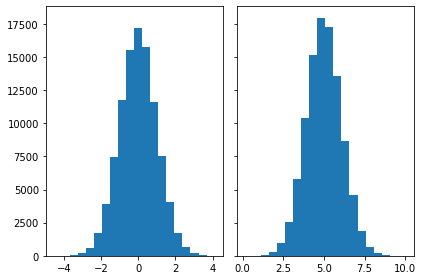

In [18]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N_points = 100000
n_bins = 20 # 20개의 구간으로 나눈다는 의미

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points) # randn은 약간 broad한 데이터 범위를 만들어주겠다...?
y = .4 * x + np.random.randn(100000) + 5 # 우상향 그래프가 만들어진다

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
# fig가 캔버스의 역할/ 1행 2열이라는 의미/ 내가 그릴 그래프들이 동등한 기준으로 그려지게 하기 위해 sharey
#sharey를 쓰지 않으면 그래프가 제각각 맞춰서 그려진다

# We can set the number of bins with the `bins` kwarg
resHist = axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

In [19]:
k = y - 5 -.4*x

In [20]:
print(k[:10])
print(x[:10])

[-1.32239123 -2.05311878  0.79788146  1.89210177  0.15916147 -0.43656953
 -0.60534154  1.70954484  1.35873182  0.55952118]
[ 1.04930431  0.86609917  0.5511346   1.72807779 -0.64928812 -0.47841958
  1.07788511  0.96881033 -0.80934479 -1.2373891 ]


In [21]:
def avrg(x):
    N = len(x)
    return x.sum() /N

def var(x):
    N = len(x)
    return np.sum((x - avrg(x))**2) / (N-1)

In [22]:
barx = avrg(x)
print("x의 평균은 %5.4f" %barx)
bary = avrg(y)
print("y의 평균은 %5.4f" %bary)
bark = avrg(k)
print("k의 평균은 %5.4f" %bark)

x의 평균은 0.0039
y의 평균은 5.0028
k의 평균은 0.0012


In [23]:
varx = var(x)
print("x의 분산은 %5.4f" %varx)
vary = var(y)
print("y의 분산은 %5.4f" %vary)
vark = var(k)
print("k의 분산은 %5.4f" %vark)

x의 분산은 1.0056
y의 분산은 1.1586
k의 분산은 1.0004


In [24]:
.4**2 * varx + vark

1.161293218815363

In [31]:
# 상관계수 구하기
def corr(x, y):
    N = len(x)
    return np.sum((x-avrg(x))*(y-avrg(y))) / (N-1)

In [32]:
corrxk = corr(x, k)
corrxk

-0.00333477626419185

In [33]:
.4**2 * varx + vark + 2*corrxk

1.1546236662869793

In [34]:
vary

1.1586253978040095

In [35]:
y.var()

1.1586138115500313

resHist에 어떤 내용이 있는지 찾아보고 그 의미를 설명하라.

- 분산은 x의 제곱의 스케일을 가진다

#### 2) histogram with density


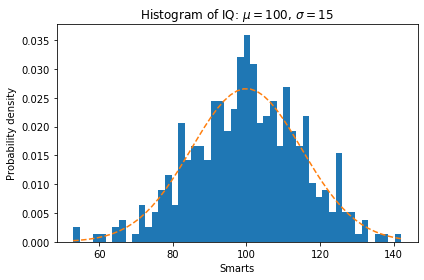

In [37]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--') # scatterplot... 점으로 찍는거임
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

### 2. boxplot

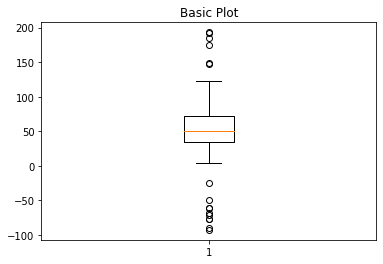

In [38]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low)) # 95개의 1차원 배열이 된다

fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
result = ax1.boxplot(data)

In [39]:
result # dictionary 형태다

{'whiskers': [<matplotlib.lines.Line2D at 0x1f5c695ed08>,
 'caps': [<matplotlib.lines.Line2D at 0x1f5c6793748>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f5c4acc348>],
 'medians': [<matplotlib.lines.Line2D at 0x1f5c6790ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f5c698cb08>],
 'means': []}

In [40]:
box = result['boxes']
box # 라인으로 만들어진 박스

In [41]:
len(box)

1

In [44]:
bx = box[0]
bx

In [46]:
bx.get_xydata()

array([[ 0.925     , 34.20342983],
       [ 1.075     , 34.20342983],
       [ 1.075     , 72.07506966],
       [ 0.925     , 72.07506966],
       [ 0.925     , 34.20342983]])

In [47]:
medians = result['medians']
medians

In [49]:
medians[0].get_xydata()

array([[ 0.925, 50.   ],
       [ 1.075, 50.   ]])

In [51]:
med = medians[0]

In [52]:
med.get_ydata() # 메디안이 50이라는 의미

array([50., 50.])

result에 어떤 내용이 있으니, 찾아보고 그 의미를 설명하라.

### 3. pie chart

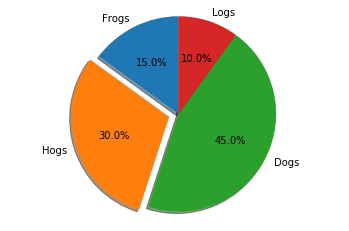

In [5]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 4. bar chart
#### 1) stacked bar chart

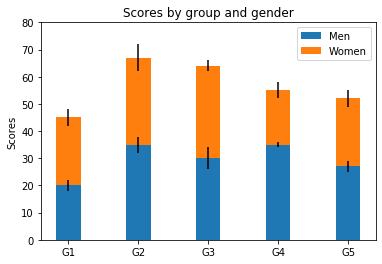

In [6]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, labels)
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

#### 2) Grouped bar chart

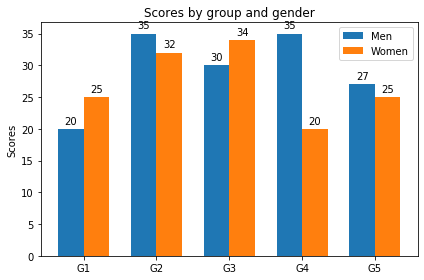

In [7]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, menMeans, width, label='Men')
rects2 = ax.bar(ind + width/2, womenMeans, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### 5. scatter plot

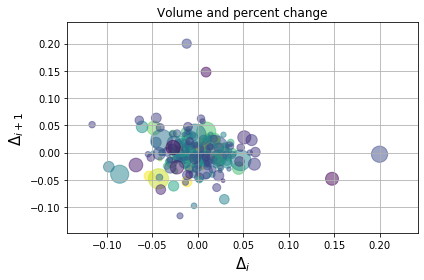

In [8]:
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
price_data = np.load('goog.npz')['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()